In [1]:
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import torch.backends.cudnn as cudnn
import torchvision.utils as vutils

import numpy as np
import matplotlib.pyplot as plt

import os
import sys

import utils

In [2]:
CUDA = True #change to FALSE if using CPU
BATCH_SIZE = 128
IMAGE_CHANNEL = 3 # describes the # of channels of img. (For MINST, it is 1)
Z_DIM = 100
G_HIDDEN = 128 #64
X_DIM = 64
D_HIDDEN = 128 #64
EPOCH_NUM = 200
REAL_LABEL = 1
FAKE_LABEL = 0
lr = 0.0002
seed = 1 #Changing this to NONE will give different results everytime

OUT_PATH = 'output_CIFAR10'
LOG_FILE = os.path.join(OUT_PATH, 'log.txt')

In [3]:
utils.clear_folder(OUT_PATH) #empty or create the output folder
print("Logging to {}\n".format(LOG_FILE))
sys.stdout = utils.StdOut(LOG_FILE)
CUDA = CUDA and torch.cuda.is_available()
print("PyTorch version: {}".format(torch.__version__))
if CUDA:
    print("CUDA version: {}\n".format(torch.version.cuda))
if seed is None:
    seed = np.random.randint(1, 10000)
print("Random Seed: ", seed)
np.random.seed(seed)
torch.manual_seed(seed)
if CUDA:
    torch.cuda.manual_seed(seed)
cudnn.benchmark = True #tells cuda to choose best set of algo for the model if input data is fixed otherwise. best alog at each iteration.
device = torch.device("cuda:0" if CUDA else "cpu")

Logging to output_CIFAR10\log.txt

PyTorch version: 2.0.0
CUDA version: 11.7

Random Seed:  1
Files already downloaded and verified
Files already downloaded and verified
<class 'torch.Tensor'>
Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 1024, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(1024, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(128, eps=1e-05, mom

Epoch 20 [100/391] loss_D_real: 0.0000 loss_D_fake: 0.0000 loss_G: 62.6955
Epoch 20 [200/391] loss_D_real: 0.0000 loss_D_fake: 0.0000 loss_G: 62.5445
Epoch 20 [300/391] loss_D_real: 0.0000 loss_D_fake: 0.0000 loss_G: 62.6136
Epoch 21 [0/391] loss_D_real: 0.0000 loss_D_fake: 0.0000 loss_G: 62.5781
Epoch 21 [100/391] loss_D_real: 0.0000 loss_D_fake: 0.0000 loss_G: 62.5724
Epoch 21 [200/391] loss_D_real: 0.0000 loss_D_fake: 0.0000 loss_G: 62.4779
Epoch 21 [300/391] loss_D_real: 0.0000 loss_D_fake: 0.0000 loss_G: 62.5276
Epoch 22 [0/391] loss_D_real: 0.0000 loss_D_fake: 0.0000 loss_G: 62.6851
Epoch 22 [100/391] loss_D_real: 0.0000 loss_D_fake: 0.0000 loss_G: 62.5905
Epoch 22 [200/391] loss_D_real: 0.0000 loss_D_fake: 0.0000 loss_G: 62.6369
Epoch 22 [300/391] loss_D_real: 0.0000 loss_D_fake: 0.0000 loss_G: 62.6077
Epoch 23 [0/391] loss_D_real: 0.0000 loss_D_fake: 0.0000 loss_G: 62.5936
Epoch 23 [100/391] loss_D_real: 0.0000 loss_D_fake: 0.0000 loss_G: 62.4573
Epoch 23 [200/391] loss_D_real:

Epoch 47 [300/391] loss_D_real: 1.3211 loss_D_fake: 0.0239 loss_G: 2.5193
Epoch 48 [0/391] loss_D_real: 0.8523 loss_D_fake: 0.0384 loss_G: 2.2096
Epoch 48 [100/391] loss_D_real: 0.1301 loss_D_fake: 0.2852 loss_G: 3.6376
Epoch 48 [200/391] loss_D_real: 0.4143 loss_D_fake: 0.0116 loss_G: 4.4440
Epoch 48 [300/391] loss_D_real: 0.1063 loss_D_fake: 0.5433 loss_G: 4.4584
Epoch 49 [0/391] loss_D_real: 1.1650 loss_D_fake: 0.0715 loss_G: 0.8116
Epoch 49 [100/391] loss_D_real: 0.1066 loss_D_fake: 0.3950 loss_G: 2.3461
Epoch 49 [200/391] loss_D_real: 0.3295 loss_D_fake: 0.0063 loss_G: 4.6095
Epoch 49 [300/391] loss_D_real: 0.0451 loss_D_fake: 0.8000 loss_G: 4.2051
Epoch 50 [0/391] loss_D_real: 0.4848 loss_D_fake: 0.1656 loss_G: 1.9120
Epoch 50 [100/391] loss_D_real: 0.3304 loss_D_fake: 0.3567 loss_G: 1.9671
Epoch 50 [200/391] loss_D_real: 0.0419 loss_D_fake: 0.4768 loss_G: 3.8321
Epoch 50 [300/391] loss_D_real: 0.1961 loss_D_fake: 0.1650 loss_G: 3.2557
Epoch 51 [0/391] loss_D_real: 0.1878 loss_D_

In [4]:
device

device(type='cuda', index=0)

In [5]:
# transform = transforms.Compose([
#     transforms.RandomHorizontalFlip(),
#     transforms.RandomCrop(32, padding=4),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.5071, 0.4867, 0.4408],
#                          std=[0.2675, 0.2565, 0.2761])
# ])

transform=transforms.Compose([
                     transforms.RandomHorizontalFlip(),
                     transforms.RandomCrop(32, padding=None),
                     transforms.Resize(X_DIM),
                     transforms.ToTensor(),
                     transforms.Normalize((0.5,), (0.5,))
                     ])

# Download and load the CIFAR100 train and test sets
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Create the data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

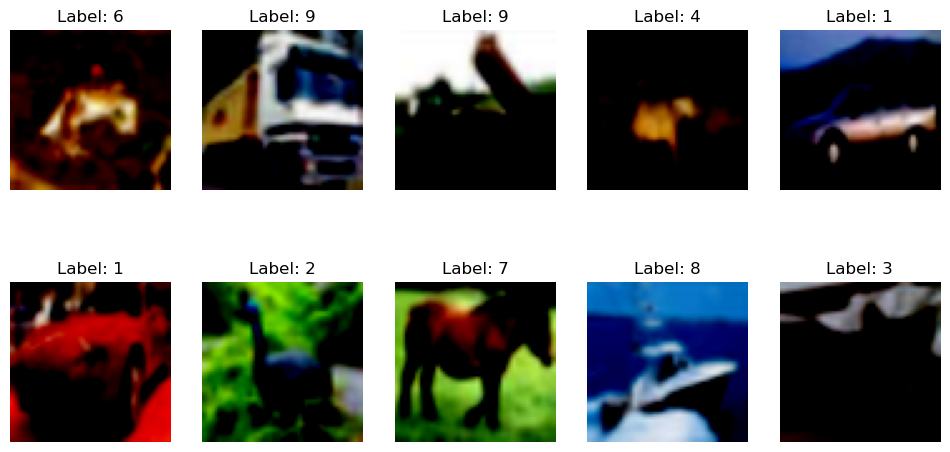

In [6]:
data_iter = iter(train_loader)
images, labels = next(data_iter)
print(type(images))
#print(images.size())
images = images.permute(0, 2, 3, 1)
#print(images.size())

fig, axs = plt.subplots(2, 5, figsize=(12, 6))
for i in range(10):
    row = i // 5
    col = i % 5
    axs[row, col].imshow(images[i])
    axs[row, col].axis('off')
    axs[row, col].set_title(f'Label: {labels[i]}')
#plt.imshow(images[4])

In [7]:
images.shape

torch.Size([128, 64, 64, 3])

In [8]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            # 1st layer
            nn.ConvTranspose2d(Z_DIM, G_HIDDEN * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(G_HIDDEN * 8),
            nn.ReLU(True),
            # 2nd layer
            nn.ConvTranspose2d(G_HIDDEN * 8, G_HIDDEN * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(G_HIDDEN * 4),
            nn.ReLU(True),
            # 3rd layer
            nn.ConvTranspose2d(G_HIDDEN * 4, G_HIDDEN * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(G_HIDDEN * 2),
            nn.ReLU(True),
            # 4th layer
            nn.ConvTranspose2d(G_HIDDEN * 2, G_HIDDEN, 4, 2, 1, bias=False),
            nn.BatchNorm2d(G_HIDDEN),
            nn.ReLU(True),
            # output layer
            nn.ConvTranspose2d(G_HIDDEN, IMAGE_CHANNEL, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, input):
        return self.main(input)

In [9]:
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        m.weight.data.normal_(0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        m.weight.data.normal_(1.0, 0.02)
        m.bias.data.fill_(0)

In [10]:
netG = Generator().to(device)
netG.apply(weights_init)
print(netG)

In [11]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            # 1st layer
            nn.Conv2d(IMAGE_CHANNEL, D_HIDDEN, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            # 2nd layer
            nn.Conv2d(D_HIDDEN, D_HIDDEN * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(D_HIDDEN * 2),
            nn.LeakyReLU(0.2, inplace=True),
            # 3rd layer
            nn.Conv2d(D_HIDDEN * 2, D_HIDDEN * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(D_HIDDEN * 4),
            nn.LeakyReLU(0.2, inplace=True),
            # 4th layer
            nn.Conv2d(D_HIDDEN * 4, D_HIDDEN * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(D_HIDDEN * 8),
            nn.LeakyReLU(0.2, inplace=True),
            # output layer
            nn.Conv2d(D_HIDDEN * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input).view(-1, 1).squeeze(1)

In [12]:
netD = Discriminator().to(device)
netD.apply(weights_init)
print(netD)

In [13]:
netG

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 1024, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(1024, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(128, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()


In [14]:
netD

Discriminator(
  (main): Sequential(
    (0): Conv2d(3, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(512, 1024, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Conv2d(1024, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (12): Sigmoid()
  )
)

In [15]:
criterion = nn.BCELoss()

optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(0.5, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(0.5, 0.999))

In [16]:
viz_noise = torch.randn(BATCH_SIZE, Z_DIM, 1, 1, device=device)
for epoch in range(EPOCH_NUM):
    for i, data in enumerate(train_loader):
        x_real = data[0].to(device)
        real_label = torch.full((x_real.size(0),), REAL_LABEL, device=device)
        fake_label = torch.full((x_real.size(0),), FAKE_LABEL, device=device)

        # Update D with real data
        netD.zero_grad()
        y_real = netD(x_real)
        # print(y_real.size())
        # print(real_label.size())
        #y_real = y_real.reshape(-1, 128)
        # print(y_real.size())
        loss_D_real = criterion(y_real.float(), real_label.float())
        loss_D_real.backward()

        # Update D with fake data
        z_noise = torch.randn(x_real.size(0), Z_DIM, 1, 1, device=device)
        x_fake = netG(z_noise)
        y_fake = netD(x_fake.detach())
        loss_D_fake = criterion(y_fake, fake_label.float())
        loss_D_fake.backward()
        optimizerD.step() #updates the model parameters

        # Update G with fake data
        netG.zero_grad()
        y_fake_r = netD(x_fake)
        loss_G = criterion(y_fake_r, real_label.float())
        loss_G.backward()
        optimizerG.step()

        if i % 100 == 0:
            print('Epoch {} [{}/{}] loss_D_real: {:.4f} loss_D_fake: {:.4f} loss_G: {:.4f}'.format(
                epoch, i, len(train_loader),
                loss_D_real.mean().item(),
                loss_D_fake.mean().item(),
                loss_G.mean().item()
            ))
            vutils.save_image(x_real, os.path.join(OUT_PATH, 'real_samples.png'), normalize=True)
            with torch.no_grad():
                viz_sample = netG(viz_noise)
                vutils.save_image(viz_sample, os.path.join(OUT_PATH, 'fake_samples_{}.png'.format(epoch)), normalize=True)
#             if epoch == EPOCH_NUM:
#                 torch.save(netG.state_dict(), os.path.join(OUT_PATH, 'netG_{}.pth'.format(epoch)))
#                 torch.save(netD.state_dict(), os.path.join(OUT_PATH, 'netD_{}.pth'.format(epoch)))

OSError: [Errno 28] No space left on device

In [ ]:
torch.save(netG.state_dict(), os.path.join(OUT_PATH, 'netG_{}.pth'.format(epoch)))
torch.save(netD.state_dict(), os.path.join(OUT_PATH, 'netD_{}.pth'.format(epoch)))